In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\bunyo\onedrive\desktop\AI_Course\ModularProgramProjects\Second_week_project\data\scrapped_data\earthquake.csv")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
# Sanani to'g'ri formatga o'tkazish
df['Date'] = pd.to_datetime(df['Date'])

# Zilzilalarning kuchi qanday taqsimlanganini ko'rsatish

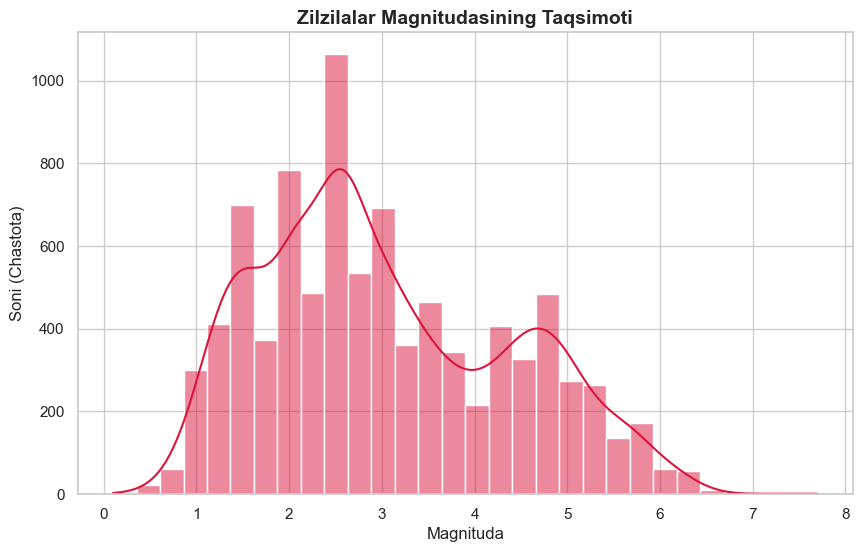

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnituda'], bins=30, kde=True, color='crimson')
plt.title('Zilzilalar Magnitudasining Taqsimoti', fontsize=14, fontweight='bold')
plt.xlabel('Magnituda', fontsize=12)
plt.ylabel('Soni (Chastota)', fontsize=12)
plt.show()

# Geografik Xarita

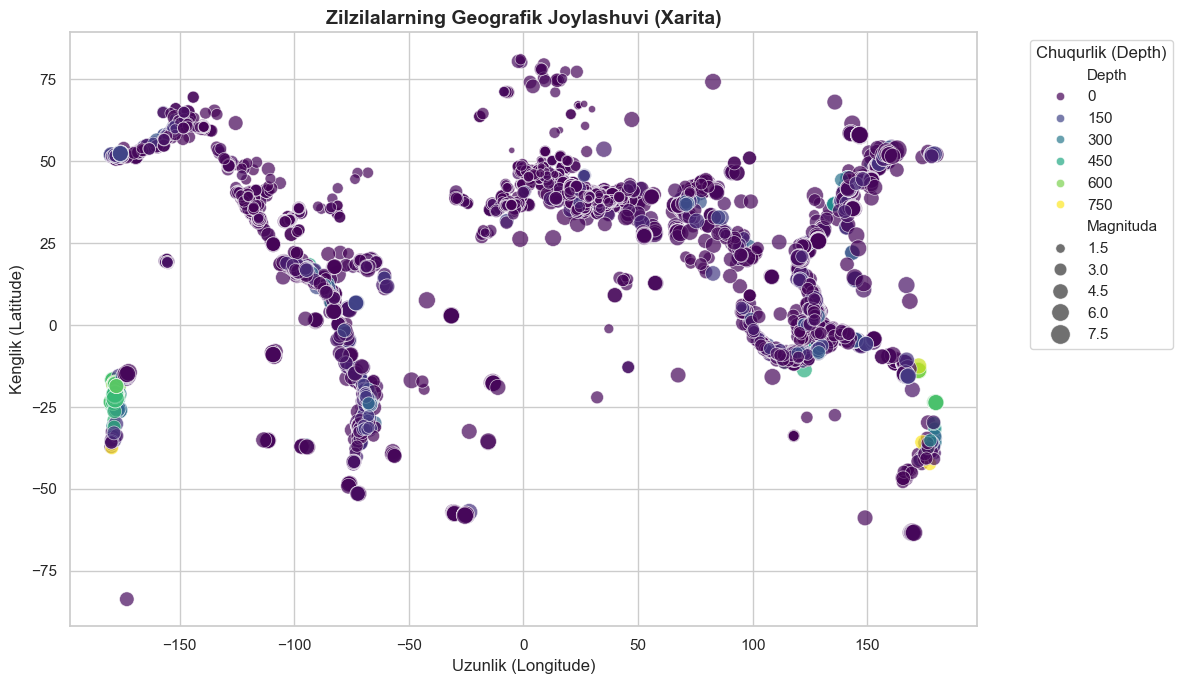

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Long_degrees', y='Lat_degrees', size='Magnituda', 
                hue='Depth', palette='viridis', sizes=(10, 200), data=df, alpha=0.7)
plt.title('Zilzilalarning Geografik Joylashuvi', fontsize=14, fontweight='bold')
plt.xlabel('Uzunlik (Longitude)')
plt.ylabel('Kenglik (Latitude)')
plt.legend(title='Chuqurlik (Depth)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Chuqurlik va Magnituda o'rtasidagi bog'liqlik

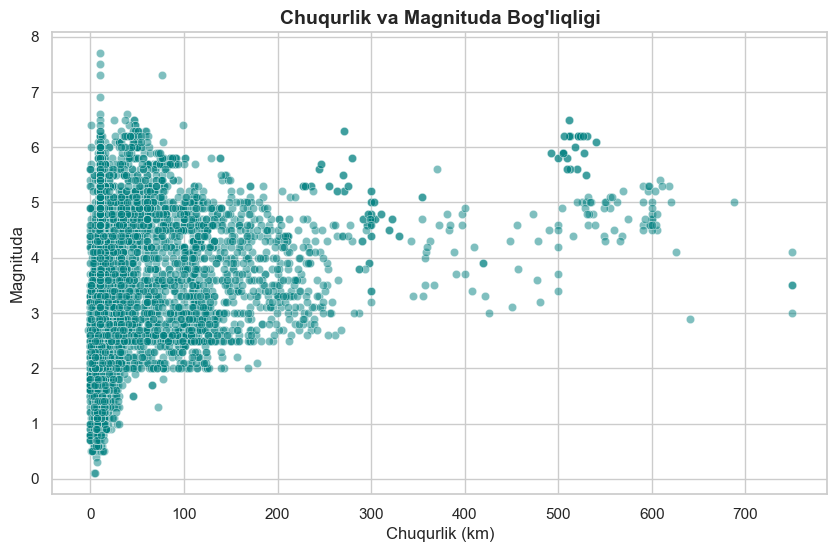

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth', y='Magnituda', data=df, alpha=0.5, color='teal')
plt.title('Chuqurlik va Magnituda Bog\'liqligi', fontsize=14, fontweight='bold')
plt.xlabel('Chuqurlik (km)')
plt.ylabel('Magnituda')
plt.show()

# Vaqt bo'yicha dinamika

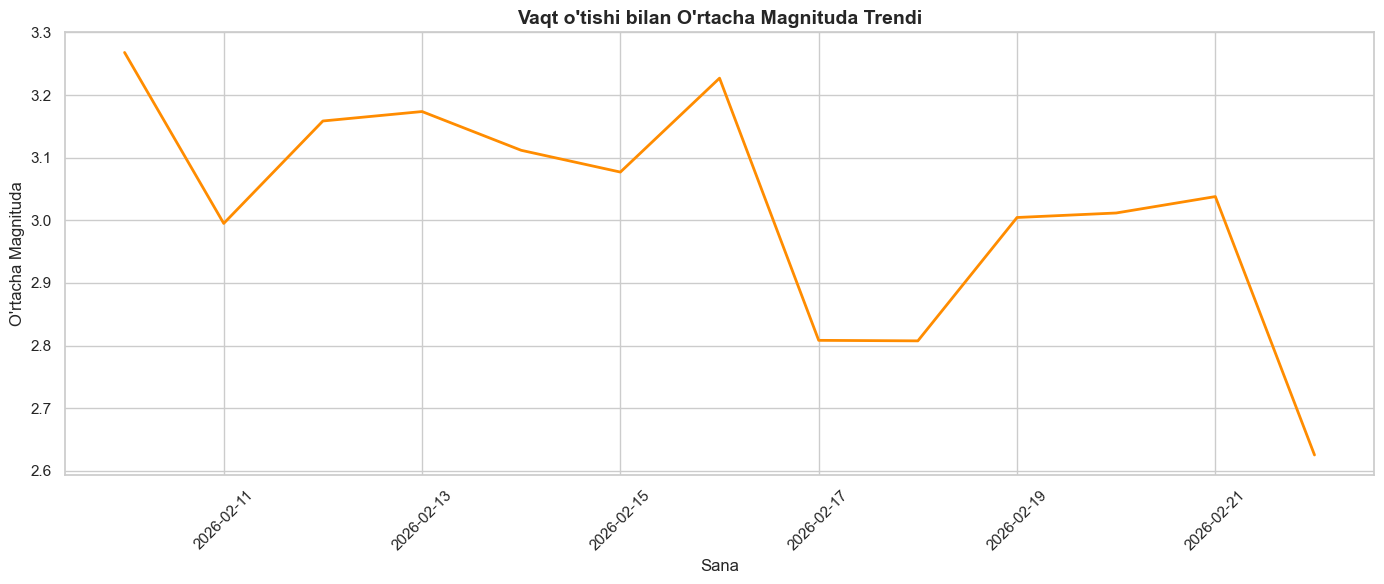

In [ ]:
# Kunlik o'rtacha magnituda
daily_mag = df.set_index('Date').resample('D')['Magnituda'].mean().dropna()

plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_mag.index, y=daily_mag.values, color='darkorange', linewidth=2)
plt.title('Vaqt o\'tishi bilan O\'rtacha Magnituda Trendi', fontsize=14, fontweight='bold')
plt.xlabel('Sana')
plt.ylabel('O\'rtacha Magnituda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Korrelyatsiya

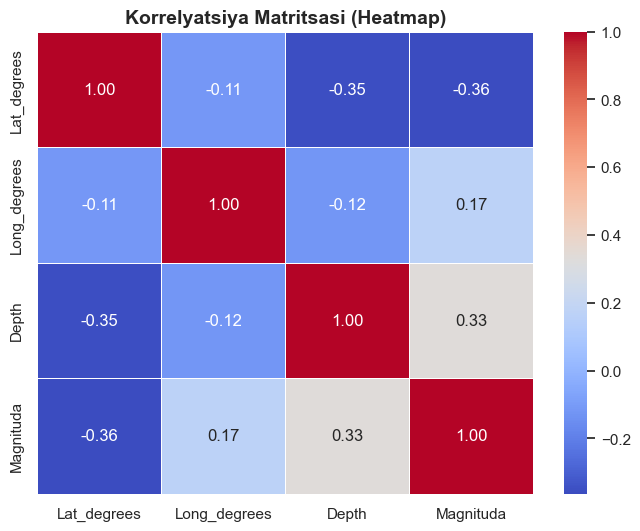

In [ ]:
plt.figure(figsize=(8, 6))
numeric_cols = df[['Lat_degrees', 'Long_degrees', 'Depth', 'Magnituda']]
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelyatsiya Matritsasi (Heatmap)', fontsize=14, fontweight='bold')
plt.show()